<a href="https://colab.research.google.com/github/mabataki2/AI-Class/blob/main/Week4/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import pandas as pd
import numpy as np


# 1. 데이터 준비
df = pd.read_csv("/content/drive/MyDrive/winequality-white.csv", sep=';').dropna()
X = df.drop('quality', axis=1)
y = df['quality']

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [32]:
from tensorflow.keras import layers, models
#스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)



In [34]:
#원-핫 인코딩
y = y.astype('category') # 이 라인을 추가하여 y의 타입을 category로 변환
Y = pd.get_dummies(y).values

In [35]:
#테스트 나누기 . validation으로는 안나눔
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [45]:

## input이 feature의 수임. X.shape[1]의 뜻은?
## Y.shape[1] 은 출력층이라서 클래스의 최종 개수임.
## 입력층, 출력층 의 개수가 중요.
model = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X.shape[1],)),  # 뉴런 수 증가
    layers.Dropout(0.3),  # 드롭아웃 추가 (30%의 뉴런을 랜덤하게 끔)
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),  # 드롭아웃 추가
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")
])

In [46]:
## 컴파일

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [47]:
# 학습

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3910 - loss: 1.5189 - val_accuracy: 0.5523 - val_loss: 1.1071
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5376 - loss: 1.1475 - val_accuracy: 0.5472 - val_loss: 1.0517
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5539 - loss: 1.0822 - val_accuracy: 0.5548 - val_loss: 1.0455
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5650 - loss: 1.0988 - val_accuracy: 0.5408 - val_loss: 1.0403
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5282 - loss: 1.0952 - val_accuracy: 0.5536 - val_loss: 1.0269
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5533 - loss: 1.0537 - val_accuracy: 0.5702 - val_loss: 1.0168
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5571 - loss: 1.0439 - val_accuracy: 0.5561 - val_loss: 1.0090
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5640 - loss: 1.0373 - val_accuracy: 0.

In [48]:

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [49]:

# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


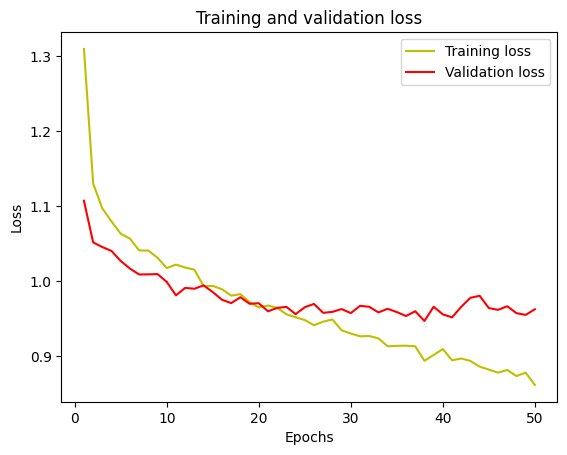

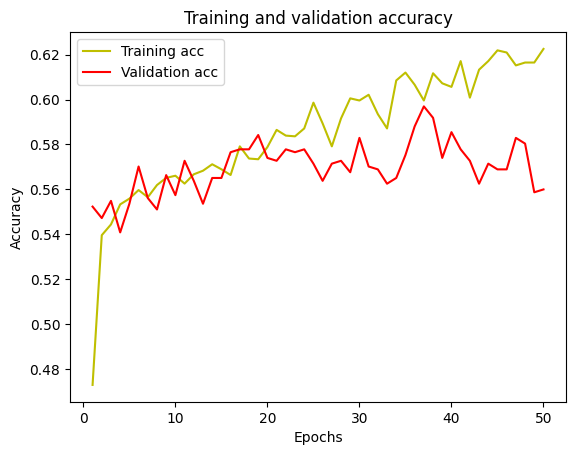

In [50]:
# 그래프 그려주는 것
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [51]:
# 결과 출력

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.75      0.12      0.20        51
           2       0.60      0.59      0.59       295
           3       0.53      0.65      0.58       409
           4       0.49      0.47      0.48       183
           5       0.25      0.03      0.05        33

    accuracy                           0.54       980
   macro avg       0.44      0.31      0.32       980
weighted avg       0.54      0.54      0.52       980

[[  0   0   7   1   1   0]
 [  0   6  28  16   1   0]
 [  0   2 173 113   7   0]
 [  0   0  76 265  67   1]
 [  0   0   4  91  86   2]
 [  0   0   0  18  14   1]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
